# 누락 데이터 처리
* 누락 데이터 확인 : isnull(), notnull()
* 누락 데이터 삭제 : dropna()
* 누락 데이터 치환 : fillna()

In [2]:
# 누락 데이터 개수 확인

import seaborn as sns

df = sns.load_dataset('titanic')

missing_df = df.isnull()
for col in missing_df.columns:
    values = missing_df[col].value_counts() # values는 True, False의 개수를 센 시리즈임
    try:
        print(col, ':', values[True])
    except:
        print(col, ':', 0)

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [3]:
df = sns.load_dataset('titanic')
for col in df.columns:
    print(col, ':', df[col].isnull().sum())

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [4]:
# 누락 데이터를 기준으로 열 삭제 - 누락데이터가 ~개 이상인 열 삭제
df_thresh = df.dropna(axis = 1, thresh = 500)
print(df_thresh.columns) # 열에 누락데이터가 500개 이상인 deck 열 삭제

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [5]:
# 누락 데이터를 기준으로 행 삭제
df_age = df.dropna(subset = ['age'], axis = 0, how = 'any')
print(len(df_age))

714


In [6]:
# 누락 데이터 치환 (누락 데이터를 평균값으로 치환)
import seaborn as sns

df = sns.load_dataset('titanic')

print(df['age'].head(10), '\n') # age 열의 첫 10개 데이터 출력

mean_age = df['age'].mean(axis = 0) # age 열의 평균 계산
df['age'].fillna(mean_age, inplace = True) # age 열의 누락데이터 값을 평균값으로 치환

print(df['age'].head(10)) # age 열의 첫 10개 데이터 다시 확인

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64 

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [7]:
# 누락 데이터 치환 (누락데이터를 최빈값으로 치환)
# idxmax() / idxmin() : 최대/최소값의 인덱스를 찾아주는 메서드

import seaborn as sns

df = sns.load_dataset('titanic')

most_freq = df['embark_town'].value_counts(dropna = True).idxmax()

df['embark_town'] = df['embark_town'].fillna(most_freq, inplace = True)

In [8]:
# 누락 데이터 치환 (method 옵션을 이용해 이웃하고 있는 값으로 치환)

import seaborn as sns

df = sns.load_dataset('titanic')

df['embark_town'].fillna(method = 'ffill', inplace = True) # method 옵션을 이용해 이웃하고 있는 값으로 치환 (ffill은 앞의 값, bfill은 뒤의 값)

# 중복 데이터 처리
* 중복 데이터 확인 : duplicated()
* 중복 데이터 제거 : drop_duplicates()

In [9]:
# 중복 데이터 확인 - duplicated()
# 이전 행과 같으면 True, 아니면 False를 반환
# 0행은 비교할 행이 없으므로 무조건 False를 반환

import pandas as pd

df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                   'c2':[1, 1, 1, 2, 2],
                   'c3':[1, 1, 2, 2, 2]})
print(df, '\n')

# 데이터 프레임 중복 데이터 찾기
print(df.duplicated())
print('\n')

# 시리즈 중복 데이터 찾기
print(df['c2'].duplicated())

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2 

0    False
1     True
2    False
3    False
4    False
dtype: bool


0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [10]:
# 중복 데이터 제거 - drop_duplicates()

import pandas as pd

df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                   'c2':[1, 1, 1, 2, 2],
                   'c3':[1, 1, 2, 2, 2]})
print(df, '\n')

# 데이터프레임에서 중복 행 제거
df2 = df.drop_duplicates()
print(df2, '\n')

# 일부 열을 기준으로 중복 행 제거
df3 = df.drop_duplicates(subset = ['c2', 'c3'])
print(df3)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2 

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2 

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


# 데이터 표준화
* 단위 환산
* 자료형 확인 : dtypes(), info()
* 자료형 변환 : astype('자료형')

In [11]:
import pandas as pd

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name'] # 열 이름 지정

print(df.dtypes) # 자료형 확인

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


In [12]:
# horsepower 열은 엔진 출력의 크기를 나타내므로 숫자형으로 변환해주어야 함

import numpy as np

print(df['horsepower'].unique(), '\n') # '?' 문자가 포함되어 있음
df['horsepower'].replace('?', np.nan, inplace = True) # '?'를 누락 데이터로 변환
df.dropna(subset = ['horsepower'], axis = 0, inplace = True) # 누락 데이터 삭제
df['horsepower'] = df['horsepower'].astype('float')

print(df['horsepower'].dtypes)

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00'] 

float64


In [13]:
# origin 열의 정수형 데이터를 문자열로 바꾸기

print(df['origin'].unique())

df['origin'].replace({1:'USA', 2:'EU', 3:'JPN'}, inplace = True)

print(df['origin'].unique())

# origin 열 자료형 바꾸기

print(df['origin'].dtypes)

df['origin'] = df['origin'].astype('category')

print(df['origin'].dtypes)

[1 3 2]
['USA' 'JPN' 'EU']
object
category


In [14]:
# model year 열의 자료형 변환

print(df['model year'].sample(3)) # sample 메서드를 이용하여 샘플 데이터를 뽑음, 년도이므로 숫자 사이에 상대적인 크기 차이 의미 없으므로 category 자료형으로 변환
df['model year'] = df['model year'].astype('category')
print(df['model year'].sample(3))

90     73
347    81
96     73
Name: model year, dtype: int64
383    82
375    82
264    78
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]


# 범주형(카테고리) 데이터 처리
* 경계값 리스트 구하기 : np.histogram()
* 각 데이터를 구간에 할당 : pd.cut()
* 더미 변수 : pd.get_dummies()

In [15]:
# horsepower 열을 범주형 데이터로 처리
# n개의 구간으로 나누려면 n+1개의 구간 경계값이 필요

import pandas as pd
import numpy as np

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

print(df.info(), '\n') # 데이터 정보 확인

print(df['horsepower'].unique(), '\n')

# horsepower 열의 누락 데이터('?')를 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace = True) 
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None 

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' 

In [16]:
# 경계값 리스트 구하기 : np.histogram()
count, bin_dividers = np.histogram(df['horsepower'], bins = 3) # count는 각 구간에 들어갈 값의 개수, bin_dividers는 각 구간의 경계값
print(bin_dividers)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# 각 구간에 데이터 할당 : pd.cut()
df['hp_bin'] = pd.cut(x = df['horsepower'], # 데이터 배열
                      bins = bin_dividers, # 경계값 리스트
                      labels = bin_names, # bin 이름
                      include_lowest = True) # 첫 경계값 포함

[ 46.         107.33333333 168.66666667 230.        ]


## 더미변수 vs 원핫인코딩

1. 더미변수 : 범주형 데이터를 머신러닝 알고리즘에 사용할 수 있도록 컴퓨터가 인식할 수 있는 데이터로 변환. 단, n개의 범주가 있다면 (n-1)개의 더미변수가 생김
<br>
2. 원핫인코딩 : 범주형 데이터를 머신러닝 알고리즘에 사용할 수 있도록 컴퓨터가 인식할 수 있는 데이터로 변환. 단, n개의 범주가 있다면 n개의 더미변수가 생김

In [17]:
# 더미변수 : pd.get_dummies()
# 범주형 데이터를 머신러닝 알고리즘에 바로 사용할 수 없는 경우가 있어 이를 컴퓨터가 인식 가능한 값으로 변환해주어야 함

import pandas as pd
import numpy as np

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

print(df.info(), '\n') # 데이터 정보 확인

print(df['horsepower'].unique(), '\n')

df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

print(df.info(), '\n')

# horsepower 데이터를 범주형 데이터로 변환
count, bin_dividers = np.histogram(df['horsepower'], bins = 3)
print(bin_dividers, '\n')
df['hp_bin'] = pd.cut(x = df['horsepower'],
                      bins = bin_dividers,
                      labels = ['저출력', '보통출력', ' 고출력'],
                      include_lowest = True)

# hp_bin 열의 범주형 데이터를 더미변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None 

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' 

In [25]:
# 원핫인코딩
# 범주형 데이터를 0,1을 원소로 갖는 원핫벡터로 변환
# 결과는 선형대수학에서 정의하는 희소행렬(sparse matrix)로 정리됨
# 예제에서는 1차원 벡터를 2차원 행렬로 변환하고 다시 희소행렬로 변환
# 희소행렬은 (행, 열) 좌표와 값 형태로 정리됨

# sklearn 라이브러리 불러오기
from sklearn import preprocessing

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder() # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder() # one hot encoder 생성

# label_encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))
print(df['hp_bin'].head(15))
print(onehot_labeled) # 즉, 보통출력을 1로, 고출력을 0으로, 저출력을 2로 변환 (ㄱㄴㄷ 순으로 !)
print(type(onehot_labeled), '\n')

# 2차원 행렬로 변환
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled), 1) # 15 * 1의 2차원 배열을 리턴함
print(onehot_reshaped)
print(type(onehot_reshaped), '\n')

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted) # (행, 열)좌표와 값 형태로 정리됨
print(type(onehot_fitted))

0     보통출력
1     보통출력
2     보통출력
3     보통출력
4     보통출력
5      고출력
6      고출력
7      고출력
8      고출력
9      고출력
10     고출력
11    보통출력
12    보통출력
13     고출력
14     저출력
Name: hp_bin, dtype: category
Categories (3, object): ['저출력' < '보통출력' < ' 고출력']
[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]
<class 'numpy.ndarray'> 

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]
<class 'numpy.ndarray'> 

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
<class 'scipy.sparse.csr.csr_matrix'>


# reshape 함수
데이터의 구조, 즉 차원과 모양을 바꿔주는 함수<br>
예를 들어 1차원 배열 x = [0, 1, 2, 3, 4, 5, 6, 7, 8]가 있다.<br>
1. x.reshape(3, 3)를 하면 2차원으로 바꾼 배열을 리턴한다. 즉 [[0, 1, 2], [3, 4, 5], [6, 7, 8]]을 리턴함<br>
2. x.reshape(3, -1)을 하면 2차원으로 바꾼 배열을 알아서 리턴하는 것이다. 결과는 [[0, 1, 2], [3, 4, 5], [6, 7, 8]]을 리턴함

## Label Encoding vs One-Hot Encoding

일단 Categorical Encoding은 범주형 인코딩으로, 쉽게 말하면 카테고리를 숫자로 바꿔주는 작업이라고 할 수 있다. 그러한 범주형 인코딩은 두 가지 방법으로 나뉜다.<br>
<br>
* Label Encoding
* One-Hot Encoding<br>
<br>
이 두가지 인코딩에 대해 자세히 알아보자.<br>
<br>
1. Label Encoding
Label Encoding이란 알파벳 순으로 숫자를 할당해주는 것을 의미한다.<br>
즉, 알파벳 순으로 0, 1, 2, 3, ..을 할당해준다.<br>
하지만 이 방법은 순서가 의미없는 데이터에 대해 랭크된 숫자 정보가 모델에 잘못 반영될 수 있다는 점이다. (ex) Country를 Label Encoding한 경우<br>
2. One-Hot Encoding
One-Hot Encoding은 쉽게 이야기하면 목록화를 해서 개별로 그 목록값에 대해 이진값을 부여하는 방법이다.<br>
예를 들어 인도, 일본, 미국을 범주로 하는 범주형 변수를 One-Hot Encoding을 하면 001, 010, 100으로 인코딩된다는 것이다.

## 원핫 인코딩, 바람직할까 ?

원핫 인코딩은 널리 사용되는 인코딩 방법이지만 아래와 같은 문제를 일으킬 수 있다.
* 높은 차원 문제 => 즉, 차원이 적을수록 좋은데 원핫인코딩은 차원을 추가함
* 다중 공선성 문제 => 즉, 다른 변수를 사용하여 변수를 쉽게 예측 가능함

물론 범주의 개수가 적은 경우, 원핫 인코딩은 나쁜 선택이 아닐 수 있다. 범주가 증가함에 따라 더 적합한 솔루션을 찾아야 한다.<br>
<br>
1. 대상 인코딩 / 평균 인코딩<br>
이 방법은 범주형 데이터의 각 값은 해당 범주의 평균 목표값으로 대체된다. 이 때 목표값이라는 것은 머신러닝에서의 target 값을 의미한다. 이는 범주형 변수와 타겟 변수 간의 관계를 보다 직접적으로 표현하여 매우 인기있는 기술이기도 하다. 하지만, target을 활용해 만들었기 때문에 변수 자체에 target의 정보를 갖는다는 것이 문제가 되기도 한다. `category_encoders` 라이브러리를 사용하여 구현할 수 있다.
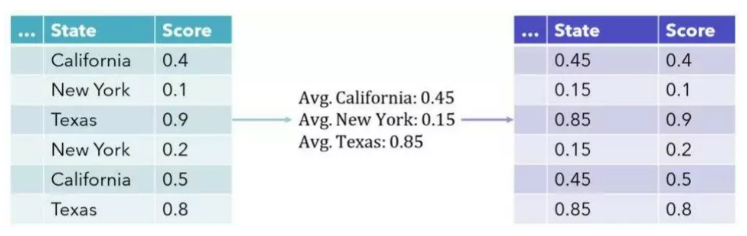<br>
<br>
2. 리브 원 아웃 코딩(Leave-one-out coding)<br>
이 방법은 평균 값을 현재 행의 값을 제외하고 계산하여 y 변수에 대한 의존성과 값의 다양성을 보상하기 위한 시도를 한다. 이는 더 다양한 코딩 값을 생성한다는 점에서 의미가 있다. category)encoders 라이브러리에서 `LeaveOneOutEncoder`을 사용하여 구현할 수 있다.
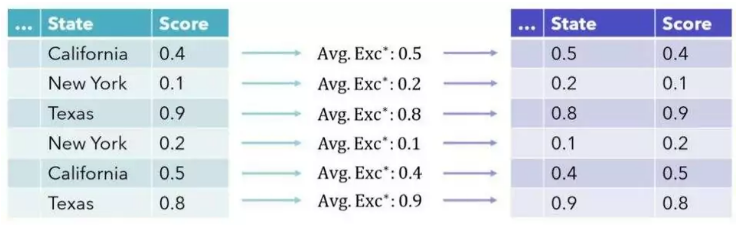<br>
3. 증거 가중치(Weight of Evidence, WoE)<br>
이 방법은 신용 측정 분야에서 시작되었으며 사용자가 채무 불이행 상태인지 구분하는데 사용되었다. WoE 계산 방법은 아래와 같다.<br>
WoE = ln(우량 고객군 구성비 / 불량 고객군 구성비)<br>
해당 비는 0 ~ 무한대의 값을 가질 수 있다.<br>
해당 비가 1보다 크고, 그 값이 더 커질수록 우량 고객군의 비율이 더 높아 우량 고객군의 성향이 높고, 반대로 해당 비가 1보다 작고, 그 값이 더 작아질수록 불량 고객군의 비율이 더 높아 불량 고객군의 성향이 높다고 할 수 있다.
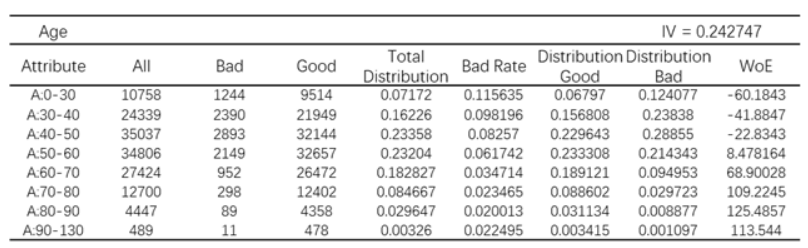

# 정규화
숫자 데이터의 상대적인 크기 차이를 제거하는 방법<br>
각 열(변수)에 속하는 데이터 값을 동일한 크기 기준으로 나눈 비율로 나타내는 것을 정규화라고 함

In [34]:
# 1. 각 열의 데이터를 해당 열의 최대값(의 절대값)으로 나누는 방법

import pandas as pd
import numpy as np

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 누락 데이터('?')를 삭제하고 실수형으로 변환
print(df.info(), '\n')
print(df['horsepower'].unique(), '\n')
df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

# horsepower 열의 최대값 확인
print(df['horsepower'].describe(), '\n') # 최대값이 230임

# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.horsepower = df.horsepower/abs(df.horsepower.max())

print(df.horsepower.head()) # 정규화된 것을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None 

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' 

In [38]:
# 2. 각 열의 데이터 중에서 최대값과 최소값을 뺀 값으로 나누는 방법
import pandas as pd
import numpy as np

df = pd.read_csv('./auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 누락 데이터('?')를 삭제하고 실수형으로 변환
print(df.info(), '\n')
print(df['horsepower'].unique(), '\n')
df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

print(df.horsepower.head(), '\n')

# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
min_x = df.horsepower - df.horsepower.min()
min_max = df.horsepower.max() - df.horsepower.min()
df.horsepower = min_x / min_max

print(df.horsepower.head(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None 

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' 

# 시계열 데이터
시계열 데이터는 특정한 시점을 기록하는 `Timestamp`와 두 시점 사이의 일정한 기간을 나타내는 `Period`가 있다.
* 시계열 객체로 변환 : pd.to_datetime() / pd.to_period() => 변환 순서는 [다른 자료형] -> [timestamp] -> [period]임
* 시계열 데이터 생성 : pd.date_range() / pd.period_range()
* 날짜 데이터 분리 : dt 속성 이용
* 날짜 인덱스 활용 가능

## 1. 시계열 객체로 변환

In [44]:
# 다른 자료형을 시계열 객체로 변환

# 1. 문자열을 Timestamp로 변환

import pandas as pd

df = pd.read_csv('stock-data.csv')

print(df.head(), '\n')
print(df.info(), '\n') # Date 열이 문자열임을 알 수 있음

# 문자열 데이터를 판다스 timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date']) # df의 새로운 열로 추가

print(df.head(), '\n')
print(df.info(), '\n')

# datetime 객체를 행 인덱스로 설정
df.set_index('new_Date', inplace = True)
df.drop('Date', axis = 1, inplace = True) # 기존 열을 삭제

print(df.head(), '\n')
print(df.info(), '\n') # 행 인덱스가 기존의 RangeIndex에서 DatetimeIndex로 바뀜

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None 

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018

In [46]:
# 2. Timestamp를 Period로 변환
# freq 옵션에 기준이 되는 기간을 설정

import pandas as pd

# 날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

# 문자열의 배열을 판다스 Timestamp 객체로 변환
to_dates = pd.to_datetime(dates)
print(to_dates, '\n') # DatatimeIndex임

# Timestamp를 Period로 변환
# freq 옵션 : 'D'(1일) / 'M'(1달) / 'A'(1년, 1년이 끝나는 12월을 기준으로 삼음)
pr_day = to_dates.to_period(freq = 'D') 
print(pr_day, '\n') # PeriodIndex 객체
pr_month = to_dates.to_period(freq = 'M')
print(pr_month, '\n') # PeriodIndex 객체
pr_year = to_dates.to_period(freq = 'A')
print(pr_year, '\n') # PeriodIndex 객체

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None) 

PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]') 

PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]') 

PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]') 



## 2. 시계열 데이터 만들기

In [49]:
# Timestamp 배열 : pd.date_range()를 사용
# 시작(start), 생성개수(periods), 시간간격(freq), 시간대(tz)를 설정해줌

import pandas as pd

# case1
ts_ms = pd.date_range(start = '2019-01-01', # 날짜 시작 범위
                      end = None, # 날짜 범위 끝
                      periods = 6, # 생성할 timestamp 개수
                      freq = 'MS', # 시간 간격 (MS는 월의 시작일)
                      tz = 'Asia/Seoul') # 시간대
print(ts_ms, '\n')

# case2
ts_me = pd.date_range(start = '2019-01-01', # 날짜 시작 범위
                      periods = 6, # 생성할 timestamp 개수
                      freq = 'M', # 시간 간격 (M은 월의 마지막 날)
                      tz = 'Asia/Seoul') # 시간대

print(ts_me, '\n')

# case3
ts_3m = pd.date_range(start = '2019-01-01', # 날짜 시작 범위
                      periods = 6, # 생성할 timestamp 개수
                      freq = '3M', # 시간간격 (3M은 3개월말 간격)
                      tz = 'Asia/Seoul') # 시간대
print(ts_3m)

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS') 

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M') 

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


In [52]:
# Period 배열 : pd.period_range() 사용

import pandas as pd

# case1
pr_m = pd.period_range(start = '2019-01-01', # 날짜 범위 시작
                       end = None, # 날짜 범위 끝
                       periods = 3, # 생성할 Period 개수
                       freq = 'M') # 기간의 길이 (M : 월)
print(pr_m, '\n')

# case2
pr_h = pd.period_range(start = '2019-01-01', # 날짜 범위 시작
                       end = None, # 날짜 범위 끝
                       periods = 3, # 생성할 Period 개수
                       freq = 'H') # 기간의 길이 (H : 시간)
print(pr_h, '\n')

# case3
pr_2h = pd.period_range(start = '2019-01-01', # 날짜 범위 시작
                        end = None, # 날짜 범위 끝
                        periods = 3, # 생성할 Period 개수
                        freq = '2H') # 기간의 길이 (2H : 2시간)
print(pr_2h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]') 

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]') 

PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')


# 3. 시계열 데이터 활용

In [54]:
# 1. 날짜 데이터 분리

import pandas as pd

df = pd.read_csv('./stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date']) # df에 새로운 열로 추가
print(df.head(), '\n')

# dt 속성을 이용하여 new_Date 열의 연-월-일 정보를 년, 월, 일로 구분
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
print(df.head())

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26 

         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  Day
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7    2
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   26


In [55]:
# Timestamp를 Period로 변환하여 연-월-일로 표기하기
# dt 속성과 to_period() 동시에 사용
df['Date_yr'] = df['new_Date'].dt.to_period(freq = 'A') # 년만 추출
df['Date_m'] = df['new_Date'].dt.to_period(freq = 'M') # 월까지 추출
print(df.head())

         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  \
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7   
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   

   Day Date_yr   Date_m  
0    2    2018  2018-07  
1   29    2018  2018-06  
2   28    2018  2018-06  
3   27    2018  2018-06  
4   26    2018  2018-06  


In [60]:
# 2. 날짜 인덱스 활용
# timestamp로 구성된 열을 행 인덱스로 지정하면 DatetimeIndex라는 고유 속성으로 변환됨
# period로 구성된 열을 행 인덱스로 지정하면 PeriodIndex라는 속성을 가짐
# 날짜 인덱스를 활용하면 시계열 데이터에 대한 인덱싱, 슬라이싱이 편리

import pandas as pd

df = pd.read_csv('./stock-data.csv')

# 문자열인 날짜 데이터를 timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])
df.set_index('new_Date', inplace = True)

print(df.head(), '\n')
print(df.index, '\n')

# 인덱싱 및 슬라이싱
df_y = df.loc['2018'] # 2018년인 행만 추출
print(df_y.head(), '\n')

df_ym = df.loc['2018-07'] # 2018년 7월인 행만 추출
print(df_ym, '\n')

df_ym_cols = df.loc['2018-07', 'Start':'High']
print(df_ym_cols, '\n')

df_ymd = df['2018-07-02']
print(df_ymd, '\n')

df_ymd_range = df['2018-06-20':'2018-06-25']
print(df_ymd_range)

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039 

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None) 

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900

C:\Users\gram\AppData\Local\Temp/ipykernel_256/4126703134.py:27: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_ymd = df['2018-07-02']
